In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [52]:
songs_df = pd.read_csv('songs.csv')

songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [53]:
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')
numerical_cols.remove('popularity')
print("Variables numericas: ",numerical_cols)
print("Cantidad: ", len(numerical_cols))

Variables numericas:  ['duration_ms', 'year', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Cantidad:  12


In [54]:
# Identificamos variables categoricas y numericas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')
print("Variables categoricas: ",categorical_cols)
print("Cantidad: ", len(categorical_cols))

Variables categoricas:  ['artist', 'song', 'explicit', 'genre', 'mode']
Cantidad:  5


In [55]:
categorical_cols.remove('mode')
categorical_cols.remove('song')
songs_df.pop('song')
print(categorical_cols)
print(songs_df.columns)
songs_df = pd.get_dummies(songs_df, columns=['artist', 'explicit', 'genre'])

['artist', 'explicit', 'genre']
Index(['artist', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')


In [56]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
target = songs_df.pop("popularity")
data = songs_df
print(data)


      duration_ms  year  danceability  energy  key  loudness  mode  \
0          211160  2000         0.751   0.834    1    -5.444     0   
1          167066  1999         0.434   0.897    0    -4.918     1   
2          250546  1999         0.529   0.496    7    -9.007     1   
3          224493  2000         0.551   0.913    0    -4.063     0   
4          200560  2000         0.614   0.928    8    -4.806     0   
...           ...   ...           ...     ...  ...       ...   ...   
1995       181026  2019         0.842   0.734    1    -5.065     0   
1996       178426  2019         0.552   0.702    9    -5.707     1   
1997       200593  2019         0.847   0.678    9    -8.635     1   
1998       171029  2019         0.741   0.520    8    -7.513     1   
1999       215280  2019         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  ...  genre_rock, blues  \
0          0.0437        0.3000          0.000018  ...                  0   
1    

In [57]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data[numerical_cols], target,test_size=0.3,train_size=0.7)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 05 May 2024   Prob (F-statistic):             0.0286
Time:                        21:57:06   Log-Likelihood:                -6241.3
No. Observations:                1400   AIC:                         1.251e+04
Df Residuals:                    1387   BIC:                         1.258e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               54.7306    216.583  

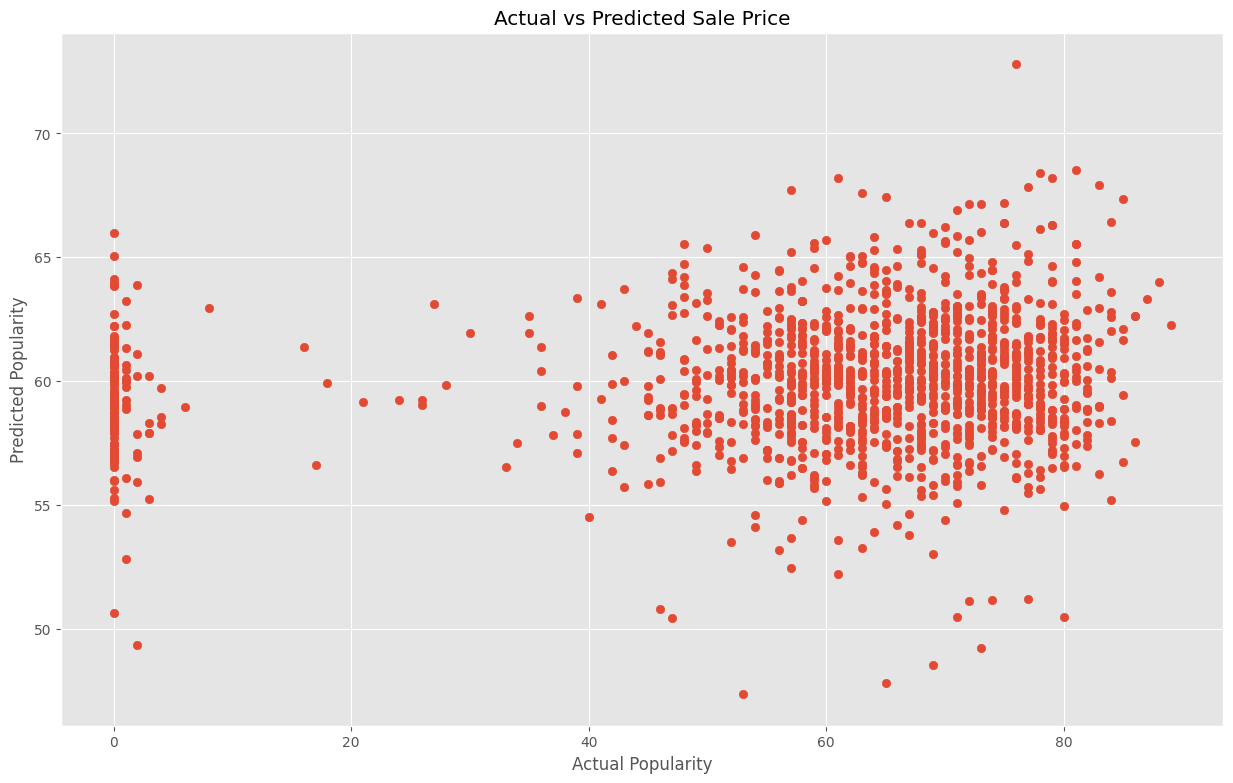

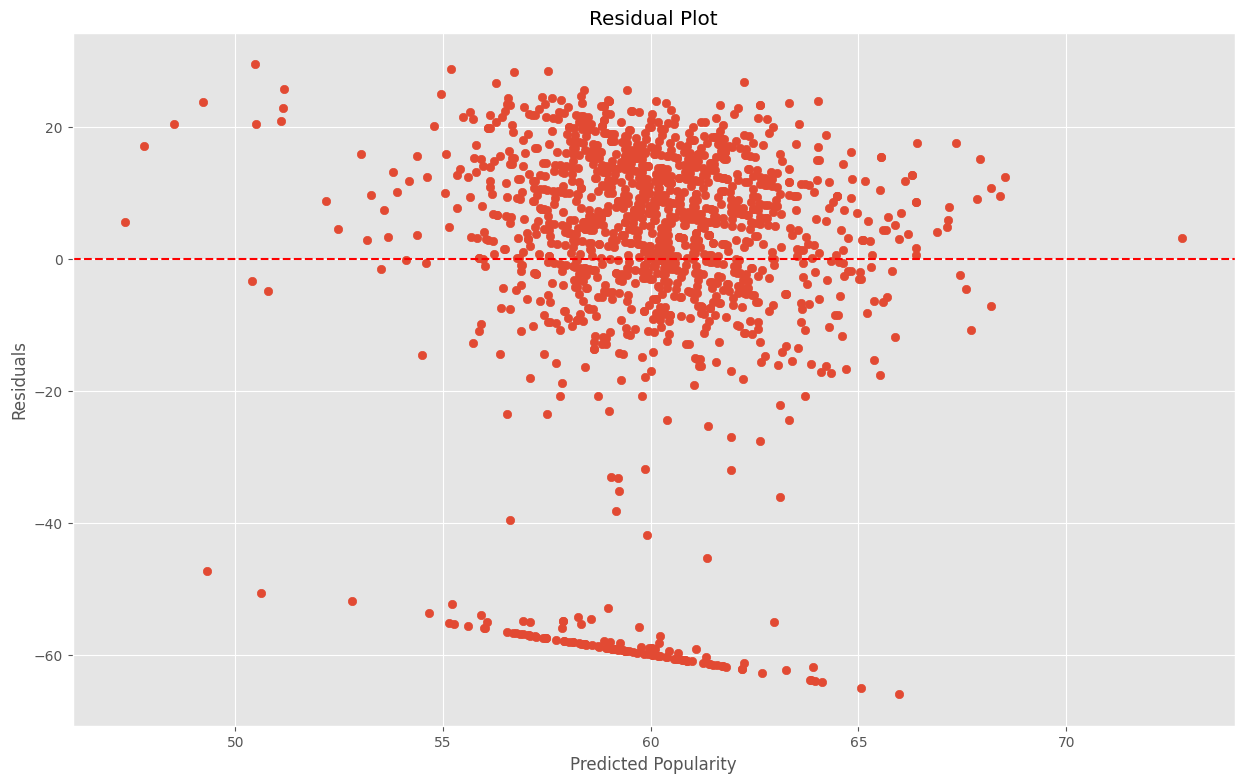

In [58]:
# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(data_train)

# Modelo de regresión lineal
model = sm.OLS(target_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X_train_const)

# Gráfico de dispersión y línea de regresión
plt.scatter(target_train, predictions)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Gráfico de residuos
residuals = target_train - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [59]:
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_train.values, i) for i in range(data_train.shape[1])]
vif["features"] = data_train.columns

print(vif)

# Calculate R-squared
r_squared = model.rsquared
print('R-squared:', r_squared)

# Calculate Adjusted R-squared
adjusted_r_squared = model.rsquared_adj
print('Adjusted R-squared:', adjusted_r_squared)
# Check for overfitting
predictions_val = model.predict(sm.add_constant(data_test))
mse_train = mean_squared_error(target_train, predictions)
mse_val = mean_squared_error(target_test, predictions_val)

print('Training MSE:', mse_train)
print('Validation MSE:', mse_val)

    VIF Factor          features
0    34.204622       duration_ms
1   196.136482              year
2    33.437925      danceability
3    53.482989            energy
4     3.282957               key
5    15.869522          loudness
6     2.325532       speechiness
7     1.989048      acousticness
8     1.085282  instrumentalness
9     2.799808          liveness
10   10.881019           valence
11   22.015749             tempo
R-squared: 0.016316345164190338
Adjusted R-squared: 0.007805743968783196
Training MSE: 436.3031039744904
Validation MSE: 490.3145138341041


MSE (test): 490.3145138341041
MAE (test): 15.14441598803464
RMSE (test): 22.14304662493633


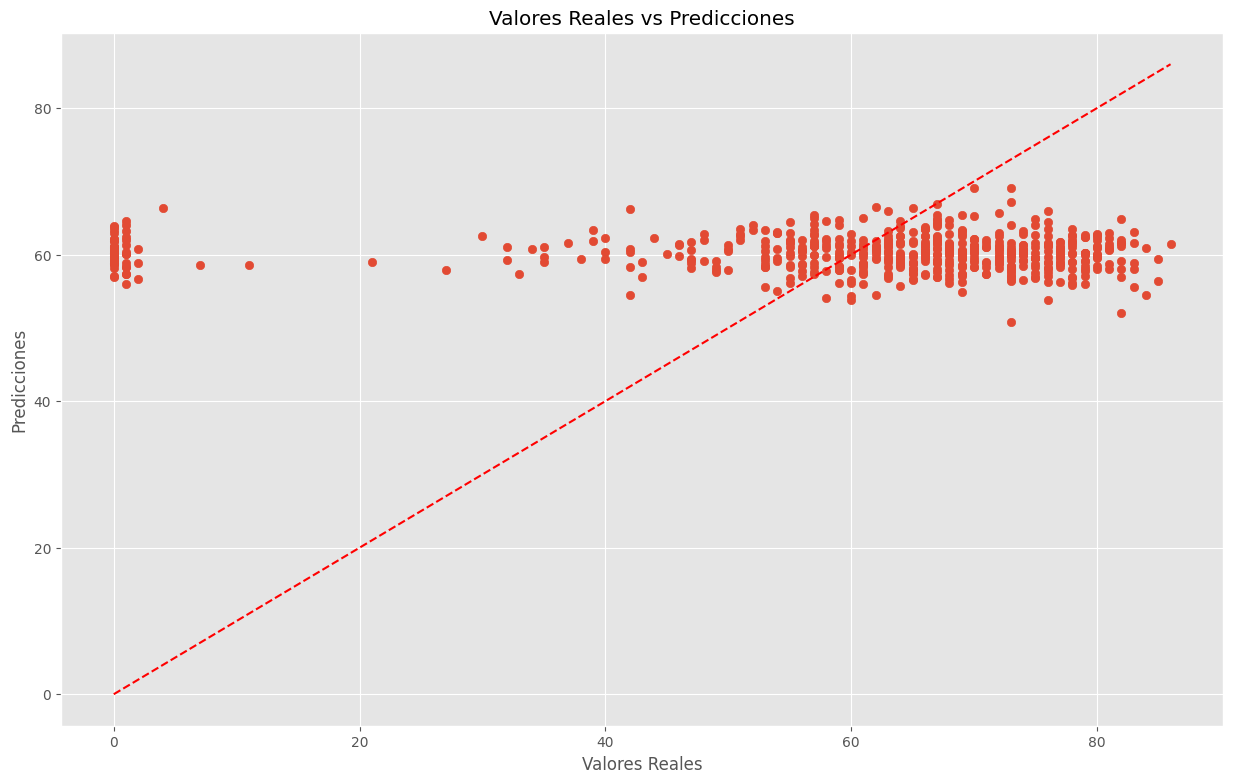

In [60]:
X_test_const = sm.add_constant(data_test)

# Calcular las predicciones del modelo en el conjunto de prueba
y_pred_test = model.predict(X_test_const)

# Calcular el MSE en el conjunto de prueba
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Crear un gráfico de dispersión de los valores reales vs las predicciones
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

plt.show()

In [61]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross-validation
scores = cross_val_score(model, data_train, target_train, cv=5, scoring='neg_mean_squared_error')

# Take the square root and make positive (because cross_val_score returns negative values for MSE)
rmse_scores = np.sqrt(-scores)

print("RMSE Scores:", rmse_scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard Deviation:", rmse_scores.std())

RMSE Scores: [23.61089558 20.13288645 18.66115268 23.41275018 20.50790554]
RMSE Mean: 21.265118087358847
RMSE Standard Deviation: 1.936540772127514


In [62]:
from sklearn.feature_selection import RFE

model = Lasso(alpha=0.1)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(data_train, target_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False  True False  True False False  True False]
Feature Ranking: [ 5  2 10  9  3  1  8  1  7  6  1  4]


MSE (test): 487.1254467015957
MAE (test): 15.074169708545053
RMSE (test): 22.07091857403302


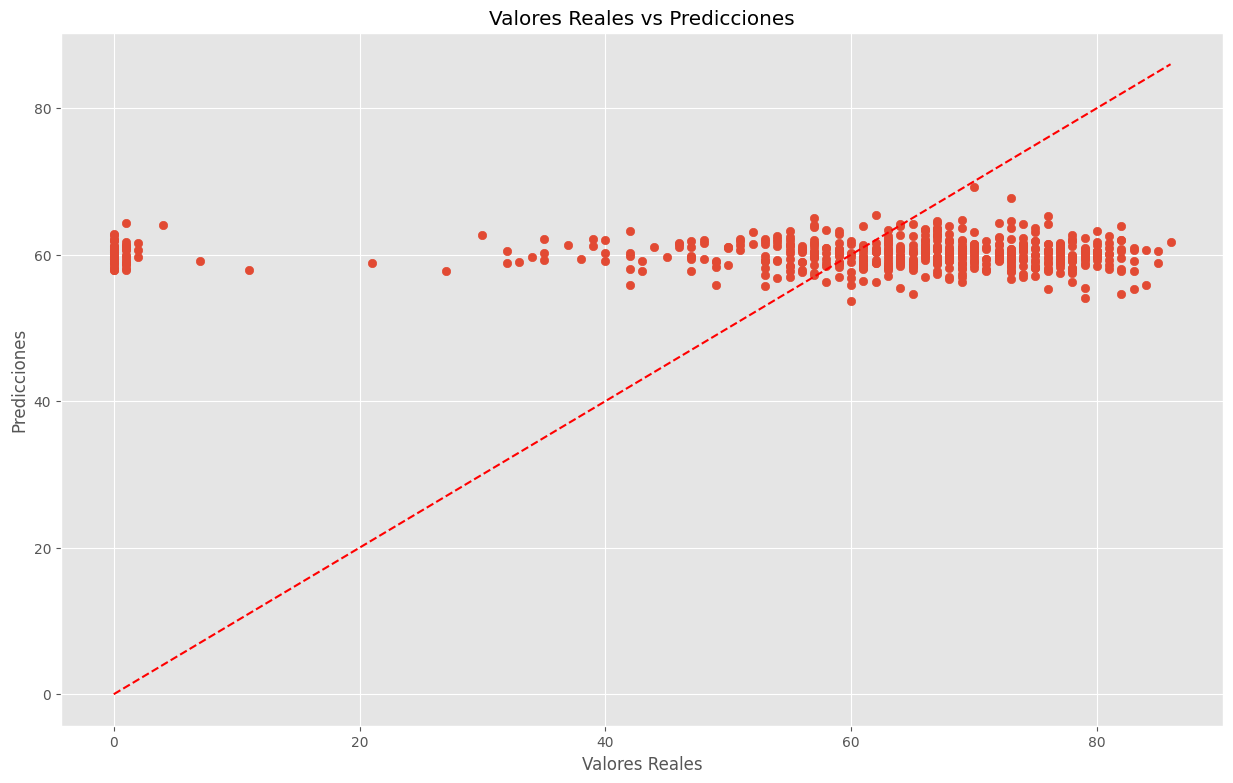

In [63]:

# Define the model
model = Lasso(alpha=0.1)

# Fit the model
model.fit(data_train, target_train)

# Make predictions
y_pred_test = model.predict(data_test)

# Calculate MSE and RMSE
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Plot the predictions
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.917
Date:                Sun, 05 May 2024   Prob (F-statistic):             0.0286
Time:                        21:57:11   Log-Likelihood:                -6241.3
No. Observations:                1400   AIC:                         1.251e+04
Df Residuals:                    1387   BIC:                         1.258e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               54.7306    216.583  

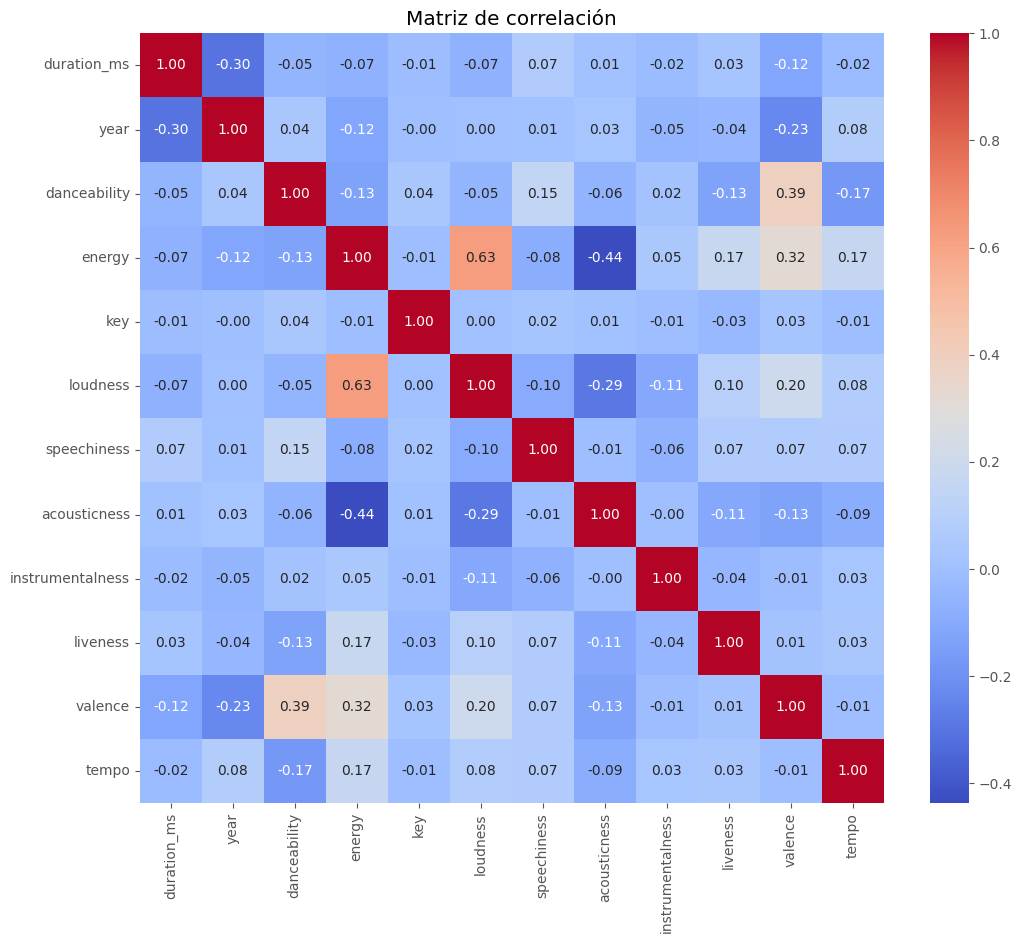

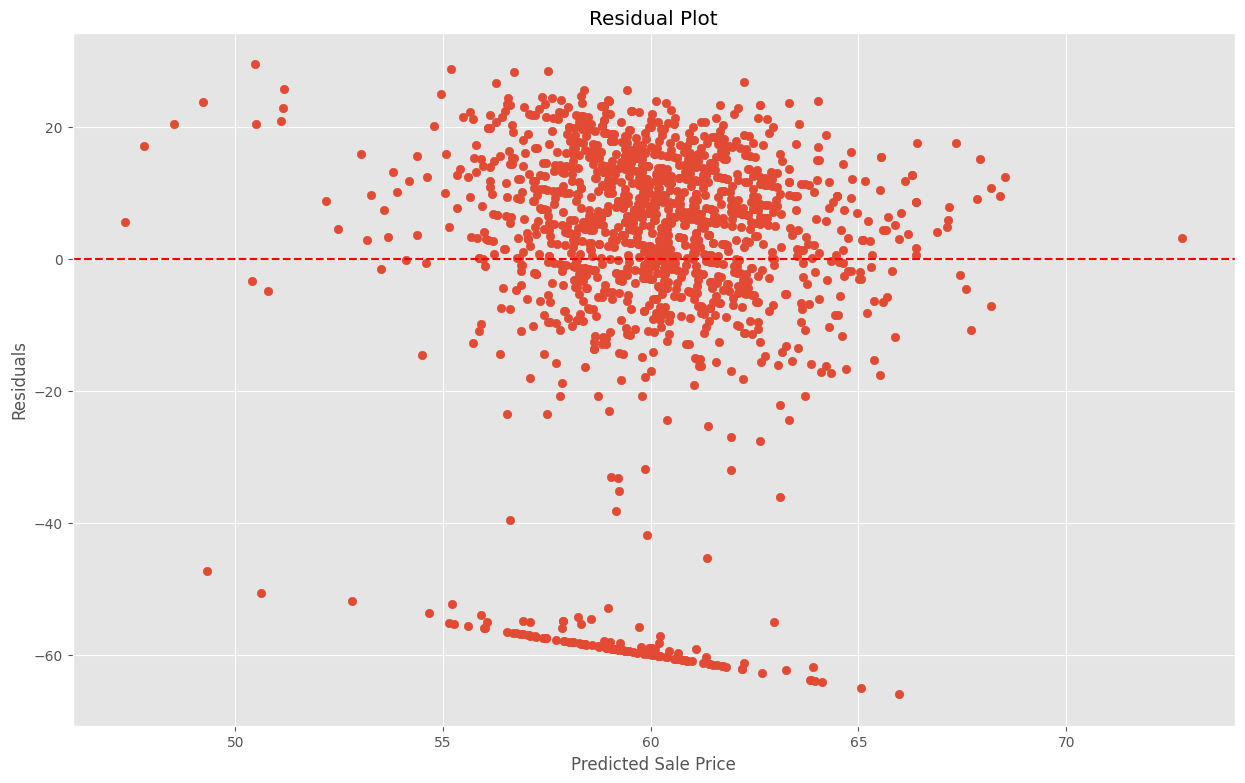


R^2 en los datos de prueba: -0.018519327303428312


In [64]:
# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(data_train)

# Modelo de regresión lineal
model = sm.OLS(target_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Análisis de multicolinealidad (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = data_train.columns
vif_data["VIF"] = [variance_inflation_factor(data_train.values, i) for i in range(len(data_train.columns))]
print("\nAnálisis de multicolinealidad (VIF):")
print(vif_data)

# Matriz de correlación
correlation_matrix = data_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

# Análisis de residuos
residuals = target_train - model.predict(X_train_const)
plt.scatter(model.predict(X_train_const), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluar el modelo en los datos de prueba
X_test_const = sm.add_constant(data_test)
test_predictions = model.predict(X_test_const)
test_residuals = target_test - test_predictions
test_r_squared = r2_score(target_test, test_predictions)
print("\nR^2 en los datos de prueba:", test_r_squared)
